In [15]:
import numpy as np
import h5py


fn = "image1-competition.hdf5"

with h5py.File(fn, "r") as f:
    data = np.array(f["data"])
    wns = np.array(f["wns"])
    tissue_mask = np.array(f["tissue_mask"])
    classes = np.array(f["classes"])

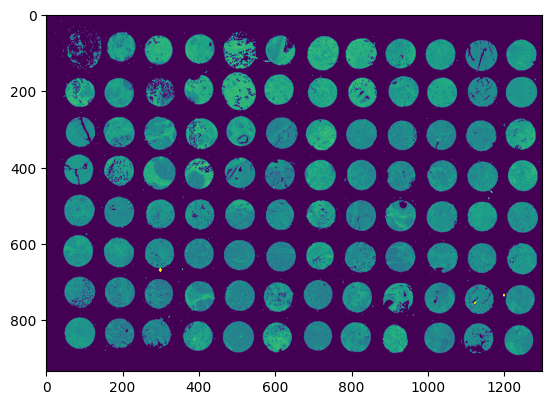

In [16]:
# display the whole image

import matplotlib.pyplot as plt

def nearest_ind(a, v):
    return np.abs(a - v).argmin()

im = data[:, :, nearest_ind(wns, 1560)]
plot = plt.imshow(im, vmin=0, vmax=1)

In [17]:
data_predict = data[265:465,360:660]

In [18]:
from nn import ANNClassification, ReLU_Activation, LeakyReLU_Activation

model = ANNClassification(units=[100,100], n_iter=1000, verbose=True, decay=0.9995, lambda_=1e-5)

In [51]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 100), activation="logistic", max_iter=15, verbose=True, learning_rate_init=1e-4, alpha=1e-5, learning_rate='adaptive', early_stopping=True, validation_fraction=0.01, solver="adam")

In [52]:
annotated_sel = classes != -1
X = data[annotated_sel]
y = classes[annotated_sel]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Adddata  augmentation to enable using bigger models

In [53]:
model.fit(X, y)

Iteration 1, loss = 1.54480127
Validation score: 0.415423
Iteration 2, loss = 1.23044286
Validation score: 0.601990
Iteration 3, loss = 1.04113255
Validation score: 0.614428
Iteration 4, loss = 0.92314610
Validation score: 0.636816
Iteration 5, loss = 0.83409740
Validation score: 0.676617
Iteration 6, loss = 0.76003009
Validation score: 0.741294
Iteration 7, loss = 0.69788122
Validation score: 0.763682
Iteration 8, loss = 0.64684719
Validation score: 0.786070
Iteration 9, loss = 0.60552600
Validation score: 0.793532
Iteration 10, loss = 0.57182227
Validation score: 0.803483
Iteration 11, loss = 0.54389376
Validation score: 0.808458
Iteration 12, loss = 0.52030214
Validation score: 0.813433
Iteration 13, loss = 0.50003943
Validation score: 0.818408
Iteration 14, loss = 0.48258220
Validation score: 0.815920
Iteration 15, loss = 0.46682933
Validation score: 0.805970


c:\Users\sebas\one\OneDrive\grive\faks\masters\y1\2nd semester\ML-DS I\ML-DS-I\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=1e-05, early_stopping=True,
              hidden_layer_sizes=(100, 100), learning_rate='adaptive',
              learning_rate_init=0.0001, max_iter=15, validation_fraction=0.01,
              verbose=True)

In [54]:
lin_data_predict = data_predict.reshape(-1, data_predict.shape[-1])
lin_data_predict = scaler.transform(lin_data_predict)

predictions = model.predict_proba(lin_data_predict)

In [55]:
predictions

array([[0.02011167, 0.26238337, 0.09684309, 0.07489569, 0.54263365,
        0.00313244],
       [0.02011167, 0.26238337, 0.09684309, 0.07489569, 0.54263365,
        0.00313244],
       [0.02011167, 0.26238337, 0.09684309, 0.07489569, 0.54263365,
        0.00313244],
       ...,
       [0.02011167, 0.26238337, 0.09684309, 0.07489569, 0.54263365,
        0.00313244],
       [0.02011167, 0.26238337, 0.09684309, 0.07489569, 0.54263365,
        0.00313244],
       [0.02011167, 0.26238337, 0.09684309, 0.07489569, 0.54263365,
        0.00313244]], dtype=float32)

In [56]:
predictions = predictions.reshape((200,300,6))

In [57]:
predictions.shape

(200, 300, 6)

In [58]:

with open("MLP_50.npy", "wb") as f:
    np.save(f, predictions.astype(np.float32))

In [ ]:
annotated_sel = classes != -1
X = wns[annotated_sel]
y = classes[annotated_sel]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
X_test = wns[~annotated_sel]